This notebook is used to save the plots for the report of the results from the feature and label extraction

In [1]:
import sys
sys.path.append('../')
from importlib import reload
import utilities.plots_metrics as pm
import matplotlib.pyplot as plt
reload(pm)
import pandas as pd
import os
import pickle

In [21]:
def overlappling_hist(data_source_1, data_source_1_label, data_source_2, data_source_2_label, title, x_label, bins = 100, alpha=0.6, y_label='Count'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.hist(data_source_1, bins=bins, alpha=alpha, label=data_source_1_label, color=plt.get_cmap('cividis')(0))
    ax.hist(data_source_2, bins=bins, alpha=alpha, label=data_source_2_label, color='orange')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(title="Data source")

In [3]:
#Load features and labels dataframe
fl_df_path = '/data/exjobb/sarssw/sar_dataset_features_labels_22_may/sar_dataset.pickle'
with open(fl_df_path, 'rb') as f:
    fl_df = pickle.load(f)

fl_df['any_nan_row_wise'] = fl_df.isna().apply(any, axis=1)
grouped = fl_df.groupby(['file_name', 'polarisations'])

fl_df['any_nan_group_wise'] = grouped['any_nan_row_wise'].transform("any")
fl_df['hom_test_group_wise'] = grouped['hom_test'].transform("all")

file_group = fl_df.groupby(['any_nan_group_wise', 'hom_test_group_wise', 'swath', 'polarisations', 'split'])

display(fl_df)
display(fl_df.columns)

,sar_name,bouy_name,file_name,pol,incidence,safe,swath,platform,orbit_pass,product,...,SWH_time,WSPD_value,WSPD_source,WSPD_lon,WSPD_lat,WSPD_time,split,any_nan_row_wise,any_nan_group_wise,hom_test_group_wise
0,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.741270,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train,False,False,True
1,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HV,28.741270,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train,False,False,True
2,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.704935,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train,False,False,True
3,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HV,28.704935,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train,False,False,True
4,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.704821,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878397,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.246292,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test,False,False,False
878398,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297585,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test,False,False,False
878399,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297779,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test,False,False,False
878400,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297394,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test,False,False,False


Index(['sar_name', 'bouy_name', 'file_name', 'pol', 'incidence', 'safe',
       'swath', 'platform', 'orbit_pass', 'product', 'platform_heading',
       'polarisations', 'longitude', 'latitude', 'time', 'subimage_index',
       'hom_test', 'contrast', 'dissimilarity', 'homogeneity', 'energy',
       'correlation', 'ASM', 'sigma_mean', 'sigma_var', 'sigma_mean_over_var',
       'sigma_min', 'sigma_max', 'sigma_range', 'acw', 'acw_db', 'acw_median',
       'acw_median_db', 'SWH_value', 'SWH_source', 'SWH_lon', 'SWH_lat',
       'SWH_time', 'WSPD_value', 'WSPD_source', 'WSPD_lon', 'WSPD_lat',
       'WSPD_time', 'split', 'any_nan_row_wise', 'any_nan_group_wise',
       'hom_test_group_wise'],
      dtype='object')

In [4]:
display(file_group['file_name'].nunique())

any_nan_group_wise  hom_test_group_wise  swath  polarisations  split
False               False                EW     HH HV          test        269
                                                               train       863
                                                               val         247
                                                VV VH          test         12
                                                               train        42
                                                               val          13
                                         IW     HH             test         23
                                                               train       153
                                                               val          46
                                                HH HV          test         28
                                                               train        97
                                                              

In [5]:
filename_grouped = file_group['file_name'].unique()
filename_list = []
for split in ['train', 'test', 'val']:
    filename_list.extend(filename_grouped[False, True, 'IW', 'VV VH', split])

In [6]:
len(filename_list)

261233

In [7]:
final_dataset = fl_df[fl_df['file_name'].isin(filename_list)]
final_dataset_VV = final_dataset[final_dataset['pol'] == 'VV']
final_dataset_VV

,sar_name,bouy_name,file_name,pol,incidence,safe,swath,platform,orbit_pass,product,...,SWH_time,WSPD_value,WSPD_source,WSPD_lon,WSPD_lat,WSPD_time,split,any_nan_row_wise,any_nan_group_wise,hom_test_group_wise
26772,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,GL_TS_MO_42360,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,VV,30.962454,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,IW,SENTINEL-1A,Ascending,GRDH,...,2021-01-01 00:00:00,10.501644,bouy,-90.4590,26.688999,2021-01-01 00:00:00,train,False,False,True
26774,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,GL_TS_MO_42360,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,VV,30.892372,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,IW,SENTINEL-1A,Ascending,GRDH,...,2021-01-01 00:00:00,10.501644,bouy,-90.4590,26.688999,2021-01-01 00:00:00,train,False,False,True
26776,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,GL_TS_MO_42360,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,VV,30.962542,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,IW,SENTINEL-1A,Ascending,GRDH,...,2021-01-01 00:00:00,10.501644,bouy,-90.4590,26.688999,2021-01-01 00:00:00,train,False,False,True
26778,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,GL_TS_MO_42360,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,VV,30.962627,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,IW,SENTINEL-1A,Ascending,GRDH,...,2021-01-01 00:00:00,10.501644,bouy,-90.4590,26.688999,2021-01-01 00:00:00,train,False,False,True
26780,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,GL_TS_MO_42360,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,VV,30.892460,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,IW,SENTINEL-1A,Ascending,GRDH,...,2021-01-01 00:00:00,10.501644,bouy,-90.4590,26.688999,2021-01-01 00:00:00,train,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878246,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IR_TS_MO_6200083,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,VV,31.082855,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IW,SENTINEL-1B,Descending,GRDH,...,2021-12-23 07:00:00,5.879277,bouy,-9.2078,43.496101,2021-12-23 07:00:00,test,False,False,True
878248,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IR_TS_MO_6200083,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,VV,31.047752,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IW,SENTINEL-1B,Descending,GRDH,...,2021-12-23 07:00:00,5.879277,bouy,-9.2078,43.496101,2021-12-23 07:00:00,test,False,False,True
878250,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IR_TS_MO_6200083,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,VV,31.047606,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IW,SENTINEL-1B,Descending,GRDH,...,2021-12-23 07:00:00,5.879277,bouy,-9.2078,43.496101,2021-12-23 07:00:00,test,False,False,True
878252,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IR_TS_MO_6200083,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,VV,31.082708,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,IW,SENTINEL-1B,Descending,GRDH,...,2021-12-23 07:00:00,5.879277,bouy,-9.2078,43.496101,2021-12-23 07:00:00,test,False,False,True


In [8]:
source_count = pd.DataFrame(final_dataset_VV.value_counts(subset=['SWH_source', 'WSPD_source']), columns=['count'])
num_files = source_count['count'].sum()
source_count['prop'] = source_count['count'] / num_files
display(source_count)


count      prop
SWH_source WSPD_source                  
bouy       model        146651  0.561380
           bouy          92094  0.352536
model      bouy          22488  0.086084

Wave height buoy mean: 1.4672710240967246
Wave height model mean: 1.4166739172216176


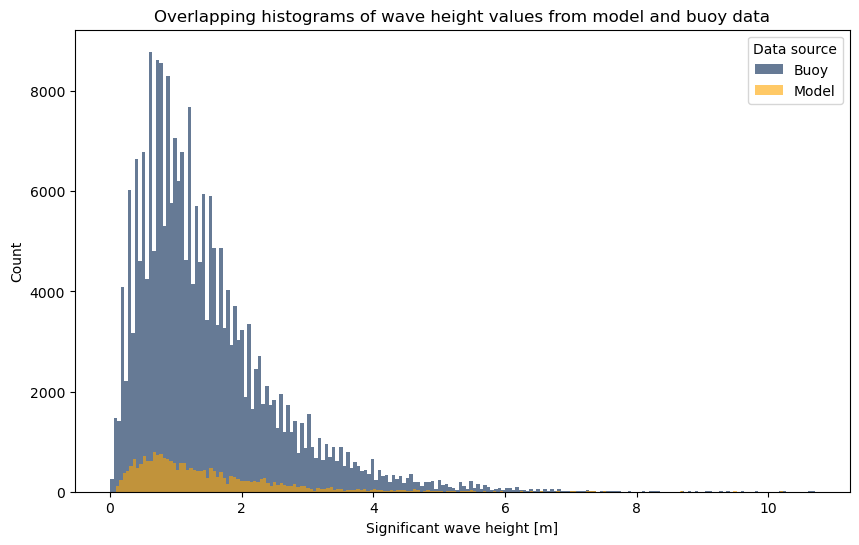

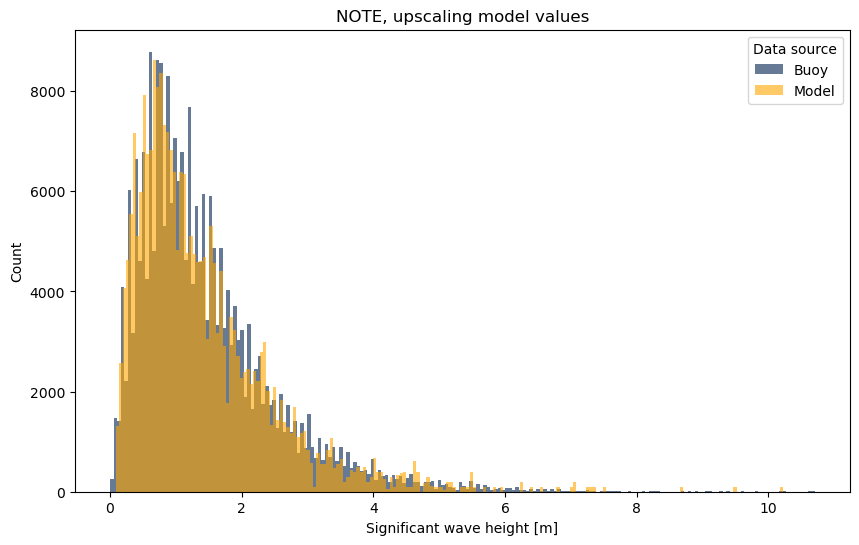

In [44]:
swh_buoy_data = final_dataset_VV[final_dataset_VV['SWH_source'] == 'bouy']['SWH_value']
swh_model_data = final_dataset_VV[final_dataset_VV['SWH_source'] == 'model']['SWH_value']

print(f"Wave height buoy mean: {swh_buoy_data.mean()}")
print(f"Wave height model mean: {swh_model_data.mean()}")
overlappling_hist(swh_buoy_data, 'Buoy', swh_model_data, 'Model', 'Overlapping histograms of wave height values from model and buoy data', 'Significant wave height [m]', bins=200)

overlappling_hist(swh_buoy_data, 'Buoy', pd.concat([swh_model_data]*11), 'Model', 'NOTE, upscaling model values', 'Significant wave height [m]', bins=200)


Wind speed buoy mean: 7.1425748721752145
Wind speed model mean: 6.6170125455239


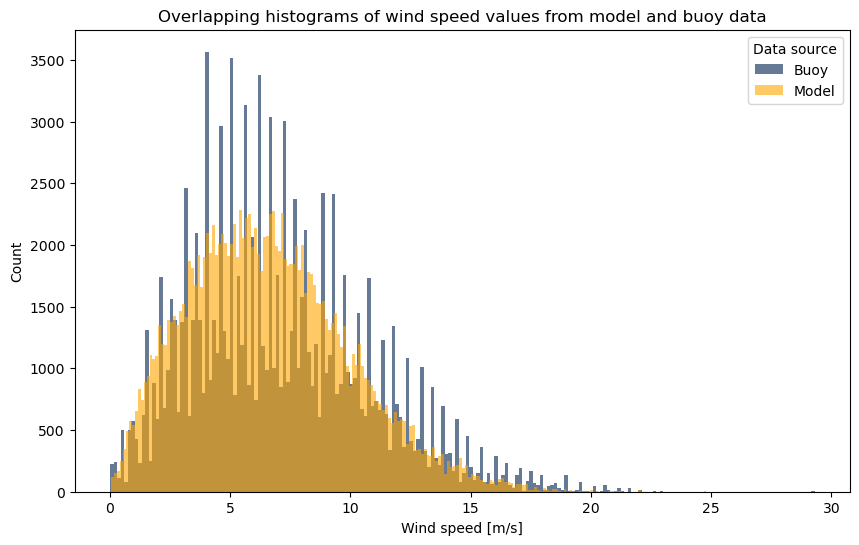

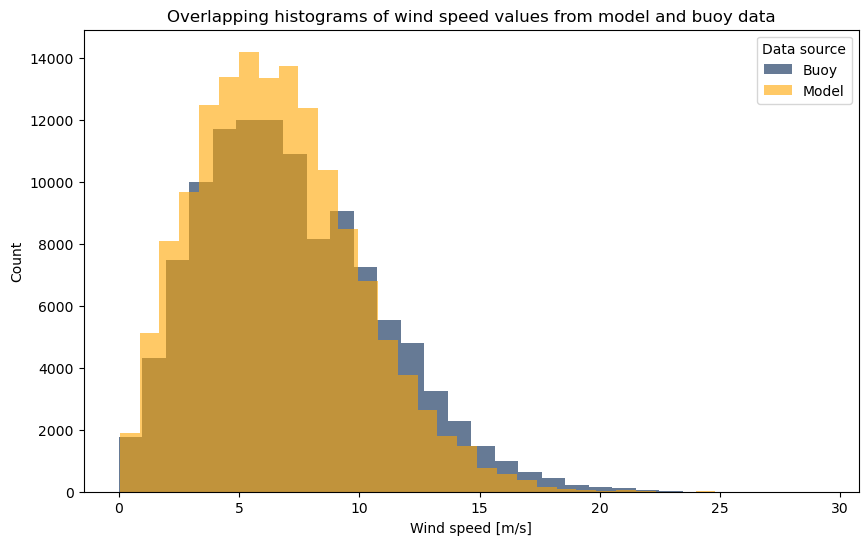

In [50]:
wspd_model_data = final_dataset_VV[final_dataset_VV['WSPD_source'] == 'model']['WSPD_value']
wspd_buoy_data = final_dataset_VV[final_dataset_VV['WSPD_source'] == 'bouy']['WSPD_value']

print(f"Wind speed buoy mean: {wspd_buoy_data.mean()}")
print(f"Wind speed model mean: {wspd_model_data.mean()}")
overlappling_hist(wspd_buoy_data, 'Buoy', wspd_model_data, 'Model', 'Overlapping histograms of wind speed values from model and buoy data', 'Wind speed [m/s]', bins=200)
overlappling_hist(wspd_buoy_data, 'Buoy', wspd_model_data, 'Model', 'Overlapping histograms of wind speed values from model and buoy data', 'Wind speed [m/s]', bins=30)
